# HW8 - Fourier Transfromation - El Niño

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("NINO34_annual_mean_1870_2020.xlsx",skio)
# convert pandas data frame to numpy matrix
data=df.to_numpy()
year=data[:,0] #year
mean=data[:,1] #mean sea surface temp  at 5S-5N and 170-120W, deg C
data

array([[1870.        ,   26.13416667],
       [1871.        ,   26.61333333],
       [1872.        ,   26.34916667],
       [1873.        ,   26.36666667],
       [1874.        ,   25.9925    ],
       [1875.        ,   26.29333333],
       [1876.        ,   26.56      ],
       [1877.        ,   28.295     ],
       [1878.        ,   27.61583333],
       [1879.        ,   26.3775    ],
       [1880.        ,   26.69083333],
       [1881.        ,   27.02083333],
       [1882.        ,   26.6       ],
       [1883.        ,   26.79916667],
       [1884.        ,   27.22916667],
       [1885.        ,   27.4425    ],
       [1886.        ,   26.28916667],
       [1887.        ,   26.46083333],
       [1888.        ,   27.875     ],
       [1889.        ,   26.96666667],
       [1890.        ,   25.78166667],
       [1891.        ,   27.055     ],
       [1892.        ,   26.22666667],
       [1893.        ,   25.81416667],
       [1894.        ,   26.14166667],
       [1895.        ,   

In [3]:
#apply FFT and frequency axis
x=year
y=mean
N=np.size(x)     # number of data points
c=np.fft.fft(y)

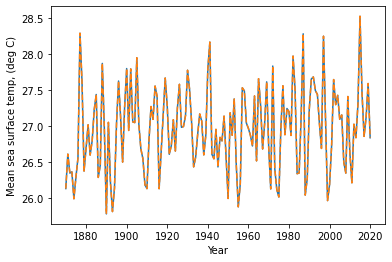

In [4]:
#simple plot of mean temp v. reconstructed FFT plot
yest=np.fft.ifft(c)
fig=plt.figure()
plt.plot(year,mean)
plt.plot(x,np.real(yest),'--')
plt.xlabel('Year')
plt.ylabel('Mean sea surface temp, (deg C)')
plt.show()

In [5]:
# check the complex FFT coefficients
c
c[0]/N
np.mean(y) #c is conjugate symmetric

26.9624944812362

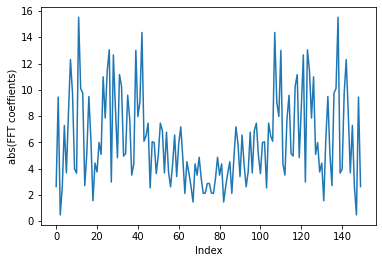

In [6]:
# get the absolute values for the coefficients, omitting the first coefficient (constant)
fig=plt.figure()
plt.plot(abs(c[1:]))
plt.xlabel('Index')
plt.ylabel('abs(FFT coeffients)')
plt.show()

In [7]:
# get unique coefficients and frequency axis 
K=np.ceil((N+1)/2).astype(int) 
print(K)
c1=c[0:K]
freq=np.arange(0,1/2+0.5/N,1/N)

76


Text(0.5, 1.0, 'periodogram of mean sea surface temp')

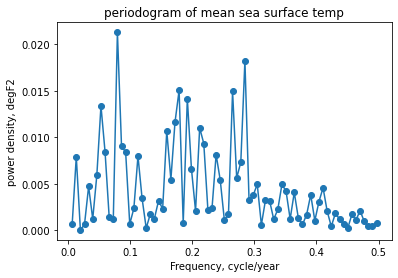

In [8]:
#create peridogram
fig=plt.figure()
# power spectrum
P0=2*abs(c1[1:])**2/N/(N-1); 
freq0=freq[1:]; 

plt.plot(freq0,P0,'o-')
plt.xlabel('Frequency, cycle/year')
plt.ylabel('power density, degF2');
plt.title('periodogram of mean sea surface temp')

In [9]:
#low pass FFT filter, 1/10 cycle/year
f_pass=1/10 # low pass filter to remove any frequencies higher than 1/10 cycle/year (period shorter than 10 years) 
ind_low_pass=np.where(freq0<f_pass)
N_low=np.size(ind_low_pass) # determine how many terms to include
print(str(N_low)+' terms')
# take the first N_low+1 (including the first term), and the last N_low terms
cX=0*c
cX[0:N_low+1]=c[0:N_low+1]
cX[-N_low:]=c[-N_low:]

15 terms


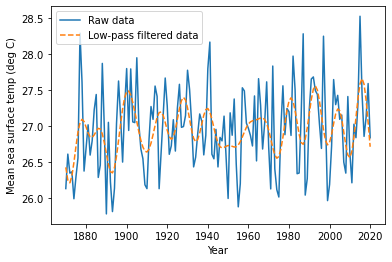

In [10]:
### inverse fft to reconstruct in time domain
yest=np.fft.ifft(cX)
fig=plt.figure()
plt.plot(year,mean,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('Mean sea surface temp (deg C)')
plt.legend()
plt.show()

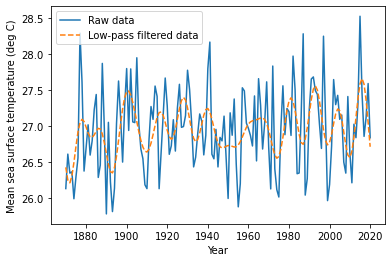

In [11]:
#get frequency axis
f_pass=1/10 
fft_freq=np.fft.fftfreq(N)
fft_freq
cX2=0*c
cX2[abs(fft_freq)<f_pass]=c[abs(fft_freq)<f_pass]

yest=np.fft.ifft(cX2)
fig=plt.figure()
plt.plot(year,mean,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('Mean sea surface temperature (deg C)')
plt.legend()
plt.show()